<a href="https://colab.research.google.com/github/Bhumika-2294/data-science-with-AI/blob/main/fashion_mnist_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

In [3]:
y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])

# Data Normalization and Reshaping

In [4]:
x_train = x_train / 255.0   #NORMALISING THIS BY DIVIDING WITH 255 BECAUSE THE RANGE OF THE COLOR IS 0-255
x_test = x_test / 255.0

In [5]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)


In [6]:
# One-Hot Encoding of Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation

In [7]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Building the CNN Model

In [24]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#In evaluating model performance, parameters can include thresholds for classification tasks or criteria for cross-validation splits. These parameters influence how well the model’s performance is assessed and compared.

# Training and Evaluating the Model

In [26]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.0941 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1009 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1071 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.1035 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 5/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.1107 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 6/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1035 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 7/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1043 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 8/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.0991 - loss: nan - val_accuracy: 0.0971 - val_loss: nan
Epoch 9/10
119/

In [27]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

119/119 - 1s - 12ms/step - accuracy: 0.0971 - loss: nan
Test accuracy: 0.09714134782552719


# Making and Visualizating Predictions

In [28]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [29]:
print(predicted_labels[:10])
print(np.argmax(y_test, axis=1)[:10])

[0 0 0 0 0 0 0 0 0 0]
[0 1 2 2 3 2 8 6 5 0]


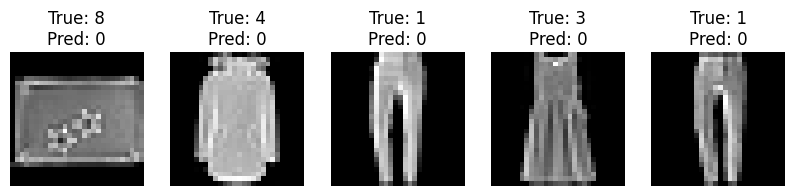

In [30]:
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(10, 5))
for i, index in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[index])}\nPred: {np.argmax(predictions[index])}")
    plt.axis('off')